In semantic segmentation, the goal is to label each individual pixel of an image according to what object class that pixel belongs to. The final result is a bitmap where each pixel will belong to a certain class:

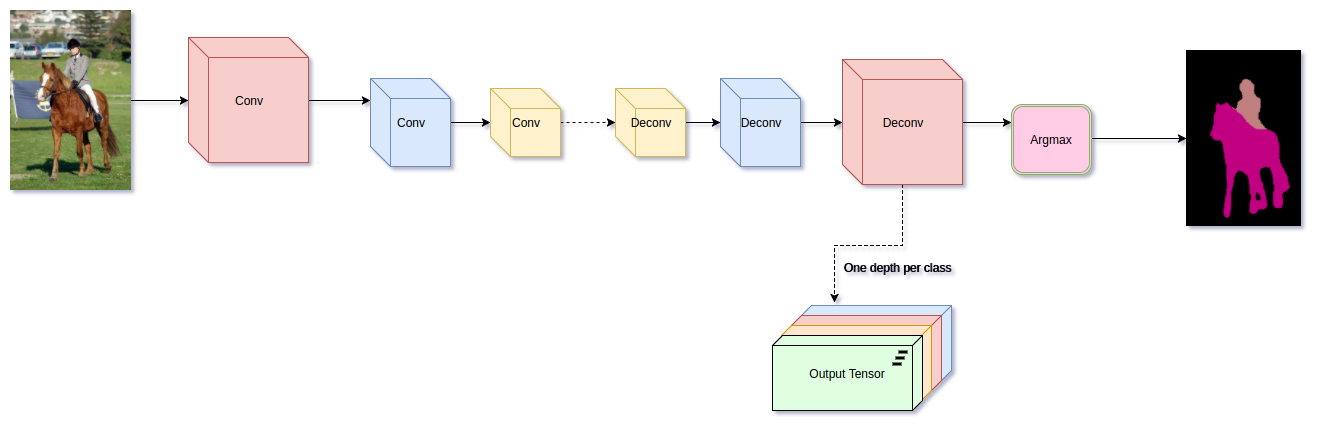

In [1]:
from IPython.display import Image
Image(filename='./images/ss.png') 

There are several popular CNN architectures that have been shown to do well at the segmentation task. Most of them are variants of a class of model called an autoencoder, Autoencoders, Variational Autoencoders, and Generative Models. For now, their basic idea is to first spatially reduce the input volume to some compressed representation and then recover the original spatial size:

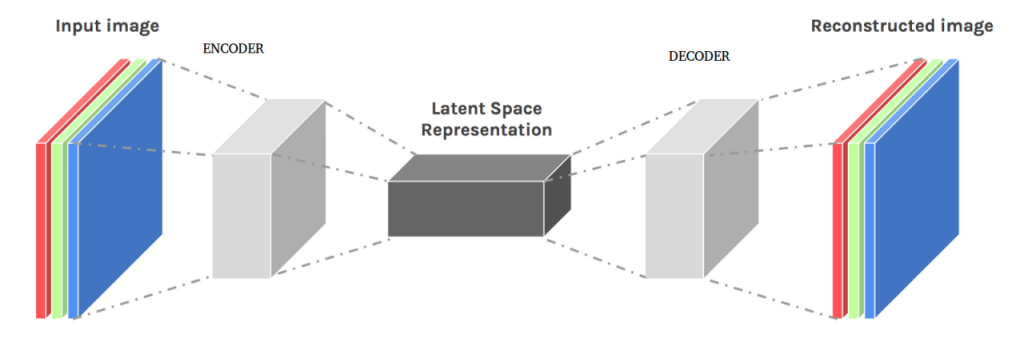

In [2]:
from IPython.display import Image
Image(filename='./images/ss1.png') 

In order to increase the spatial size, there are some common operations that are used, which include the following:

Max Unpooling
Deconvolution/Transposed Convolution
Dilated/Atrous Convolution
There's also a new variant of softmax that is used in the semantic segmentation task that we will learn about, which is called spatial softmax.

In this section, we will learn about two popular models that perform well at semantic segmentation and have very straightforward architectures to understand; they are as listed:

FCN (Fully Convolutional Networks)
Segnet
Some other implementation details that need to be addressed are these:

The final upsampling layer (Deconv) needs to have as many filters as classes to segment, and your label "colors" need to match the indexes inside this last layer, otherwise you may have some NaN issues during training
We need an Argmax layer to select the pixel with the strongest probability on the output tensor (during prediction time only)
Our loss needs to take into account all the pixels on the output tensor

### Max Unpooling

The unpooling operation is used to revert the effect of the max pooling operation; the idea is just to work as an upsampler. This operation has been used on some older papers and is not used so much anymore due to the fact that you also need a CONV layer to inpaint (low pass filter) the results of the upsampling:

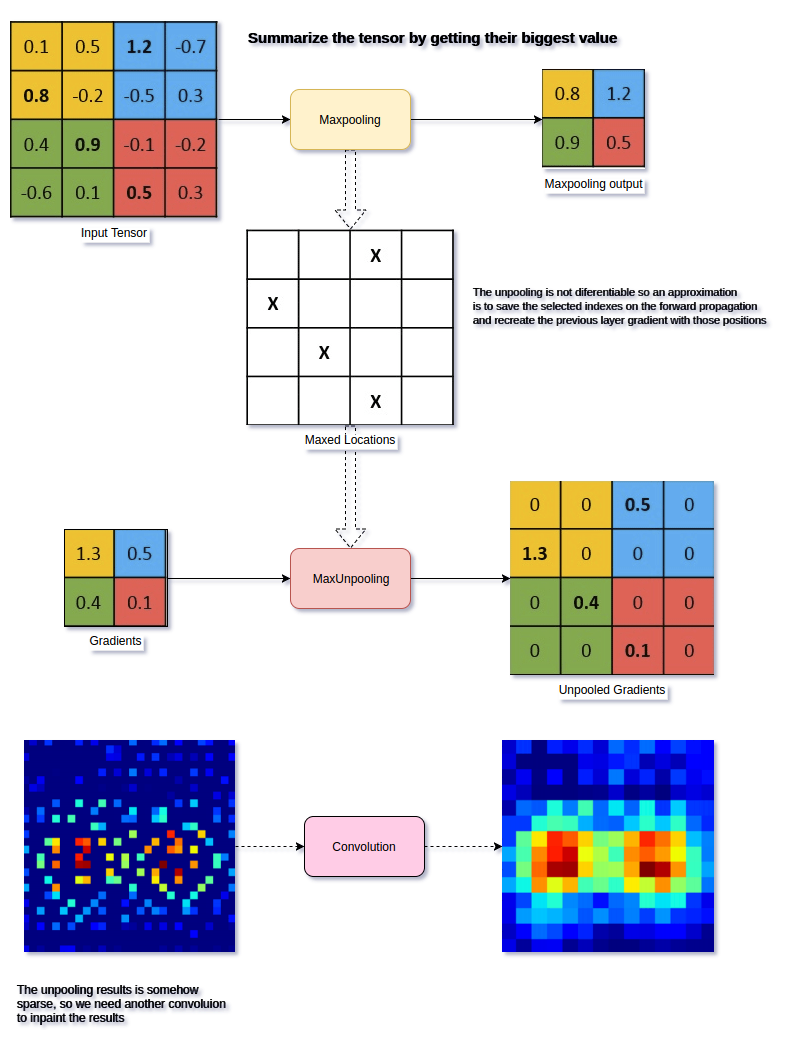

In [3]:
from IPython.display import Image
Image(filename='./images/maxpool.png') 

#### Deconvolution layer (Transposed convolution)

This operation is rather badly named as deconvolution, which implies that it is the inverse operation to convolution, but that is not actually the case. The more apt name is transposed convolution or fractionally-strided convolution.

This layer type offers you a learnable way of upsampling an input volume and can be used every time that you need to intelligently project an input feature map to a higher spatial space. Some use cases include the following:

Upsampling (strided transposed convolution) == UNPOOL+CONV<br>
Visualizing salient maps
As part of autoencoders

### The loss function

As mentioned, the loss function for segmentation models will basically be an extension of the classification loss, but working spatially throughout the whole output vector:

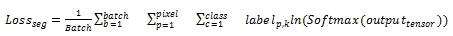

In [4]:
from IPython.display import Image
Image(filename='./images/segloss.png') 

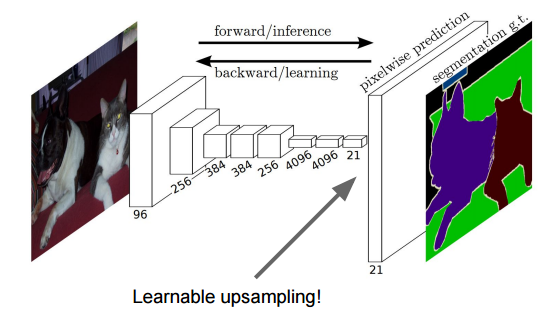

In [5]:
from IPython.display import Image
Image(filename='./images/segloss1.png') 

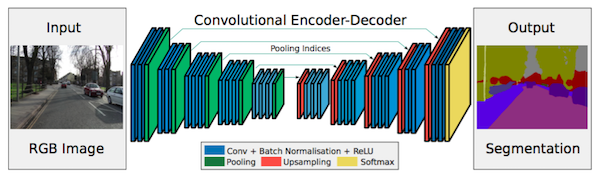

In [6]:
from IPython.display import Image
Image(filename='./images/segnet.png') 

### Labels
As mentioned earlier, the labels in the segmentation problem are one-dimensional images with a value at each pixel that matches the index of the output volume depth

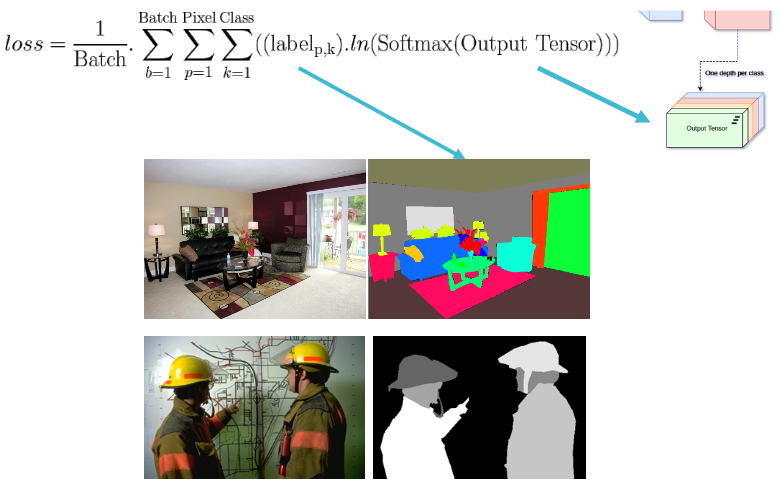

In [7]:
from IPython.display import Image
Image(filename='./images/seglabel.png') 

### Improving results
One technique that is normally used to improve the results of the segmentation output is to use Conditional Random Fields (CRF) at the post-processing stage, by taking into account pure RGB features of the image and probabilities produced by our network:

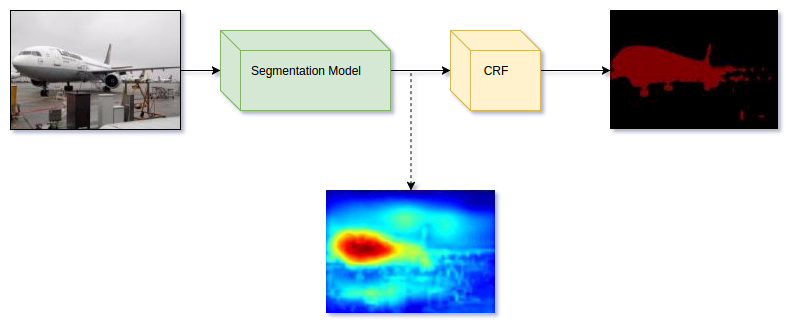

In [8]:
from IPython.display import Image
Image(filename='./images/segreg.png') 

#### Instance segmentation

Instance segmentation is the last thing we will look at in this chapter. In many ways, it can be thought of as a fusion of object detection and semantic segmentation. However, it is definitely a step up in difficulty compared to those two problems.

With instance segmentation, the idea is to find every occurrence, what is called an instance, of a desired object or objects within an image. Once these are found, we want to segment off each instance from the other, even if they belong to the same class of objects. In other words, labels are both class-aware (such as car, sign, or person) and instance-aware (such as car 1, car 2, or car 3).

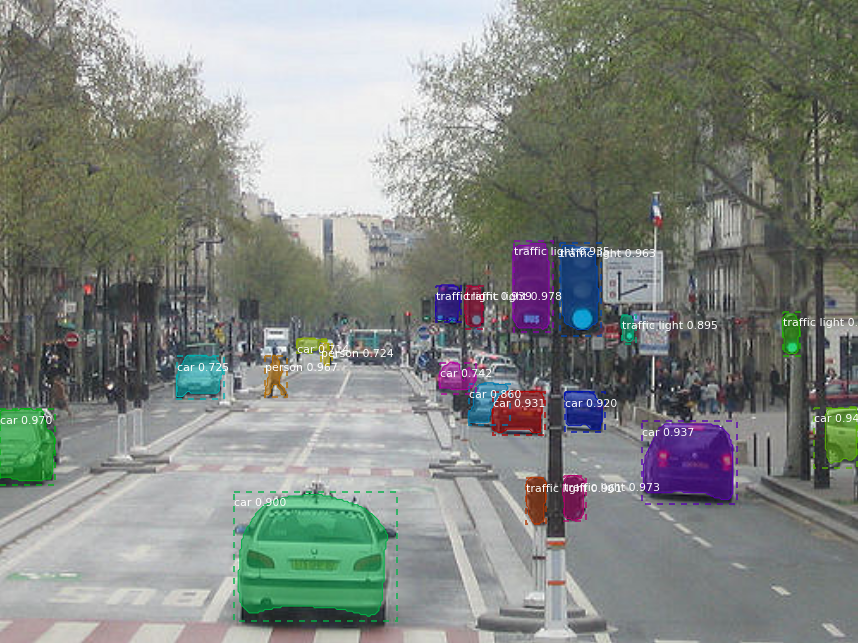

In [9]:
from IPython.display import Image
Image(filename='./images/instanceseg.png') 

The similarity between this and semantic segmentation is clear; we still label pixels according to what object they belong to. However, while semantic segmentation has no knowledge of how many times a certain object occurs within an image instance, segmentation does.

This ability to know how many instances of an object are in an image also makes this problem similar to object detection. However, object detection produces a much coarser object boundary, which means occluded objects are more likely to be missed, which shouldn't happen with instance segmentation.

### Mask R-CNN

One recent network architecture that went some way in making this problem easier to solve by providing a simple, flexible model architecture is Mask R-CNN. Published in 2017, the architecture looks at extending the capabilities of faster R-CNN:

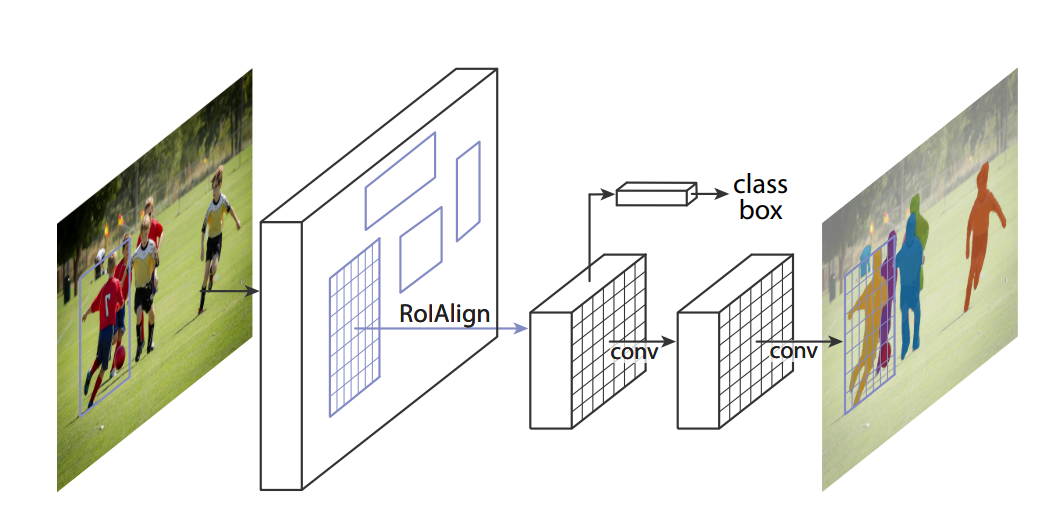

In [10]:
from IPython.display import Image
Image(filename='./images/maskrnn.png') 

It takes the existing faster R-CNN model and tries to solve the instance-segmentation problem by adding a branch to the model that is responsible for predicting object masks in parallel to the classification and bounding-box regression head. This architecture proved effective and achieved top honors in all the COCO challenges at the time of publishing.